Analysis of partition datasets in route ../dataset/partitions
Target: averaged_queue_time_per_job

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

Analysis of medium partition
Based on techniques from book Python Data Science Essentials

In [12]:
medium_df = pd.read_csv("../dataset/partitions/medium_partition.csv", index_col=False)
medium_df.describe().transpose()

count          mean           std  \
date                                  25716.0  1.679344e+09  2.710670e+06   
availability                          25708.0  1.000000e+00  0.000000e+00   
avg_alloc_mem                         25708.0  1.098207e+05  2.346865e+04   
avg_allocated_cpus_per_job            25709.0  7.864055e+02  2.500667e+02   
avg_allocated_nodes_per_job           25709.0  3.071354e+00  9.788056e-01   
node_total                            23796.0  1.334600e+03  6.302740e+01   
avg_cpus_load_lower                   25708.0  7.681426e+01  1.689330e+02   
nodes                                 23796.0  1.334600e+03  6.302740e+01   
avg_cpus_load_upper                   25708.0  1.675540e+02  2.422030e+02   
avg_execution_time_per_job            25709.0  5.340006e+04  1.340223e+04   
avg_free_mem_lower                    25708.0  1.874039e+05  1.878124e+04   
avg_free_mem_upper                    25708.0  2.349238e+05  7.533645e+03   
avg_job_size_lower                    25708.0  1.000000e+00  0.000000e+00   
avg_job_size_upper                    25708.0  2.000000e+01  0.000000e+00   
avg_maximum_allocated_cpus_per_job    25709.0  6.718704e+02  1.847031e+02   
avg_maximum_allocated_nodes_per_job   25709.0  3.071354e+00  9.788056e-01   
avg_memory                            25708.0  2.400000e+05  0.000000e+00   
avg_minimum_requested_cpus_per_job    25709.0  1.086767e+02  1.609321e+01   
avg_minimum_requested_memory_per_job  25709.0  2.146276e+05  3.348387e+04   
avg_minimum_requested_nodes_per_job   25709.0  3.470242e+00  1.899395e+00   
avg_pending_jobs                      25709.0  1.407124e+02  1.277102e+02   
node_alloc                            23796.0  1.045764e+03  3.186335e+02   
avg_queue_time_per_job                25709.0  6.308103e+04  4.629562e+04   
node_idle                             23796.0  2.888361e+02  3.225334e+02   
avg_requested_cpus_per_job            25709.0  4.322152e+02  2.496609e+02   
avg_running_jobs                      25709.0  2.938052e+02  1.058587e+02   
avg_time_left_per_job                 25709.0  8.084025e+04  1.578607e+04   
avg_time_limit                        25708.0  1.296000e+05  0.000000e+00   
cores                                 25708.0  1.600000e+01  0.000000e+00   
cpus                                  25708.0  2.560000e+02  0.000000e+00   
node_other                            23796.0  0.000000e+00  0.000000e+00   

                                               min           25%  \
date                                  1.674810e+09  1.676872e+09   
availability                          1.000000e+00  1.000000e+00   
avg_alloc_mem                         0.000000e+00  9.298000e+04   
avg_allocated_cpus_per_job           -1.000000e+00  6.256783e+02   
avg_allocated_nodes_per_job          -1.000000e+00  2.444056e+00   
node_total                            3.000000e+00  1.324000e+03   
avg_cpus_load_lower                   0.000000e+00  3.636600e+01   
nodes                                 3.000000e+00  1.324000e+03   
avg_cpus_load_upper                   2.000000e-02  9.505513e+01   
avg_execution_time_per_job           -1.000000e+00  4.452556e+04   
avg_free_mem_lower                    7.658000e+03  1.794635e+05   
avg_free_mem_upper                    1.602838e+05  2.304339e+05   
avg_job_size_lower                    1.000000e+00  1.000000e+00   
avg_job_size_upper                    2.000000e+01  2.000000e+01   
avg_maximum_allocated_cpus_per_job    2.032796e+02  5.398690e+02   
avg_maximum_allocated_nodes_per_job  -1.000000e+00  2.444056e+00   
avg_memory                            2.400000e+05  2.400000e+05   
avg_minimum_requested_cpus_per_job    4.096528e+01  1.008208e+02   
avg_minimum_requested_memory_per_job  6.056881e+04  2.025472e+05   
avg_minimum_requested_nodes_per_job  -1.000000e+00  2.340164e+00   
avg_pending_jobs                      0.000000e+00  4.400000e+01   
node_alloc                            0.000000e+00  8.030000e+02   
avg_queue_t

In [13]:
medium_df.shape

(25716, 31)

Data preprocessing
1- detect null values
2- convert date to time index
3- remove features with no variance
4- Histograms for feature value distribution
5- Detection of outliers
6- Correlation between features
7- Dimensionality reduction
8- Feature selection



In [14]:
# 1- detect columns to drop based on occurrence of null values (>1%)
null_values = medium_df.isnull().sum() * 100 / len(medium_df) # values gives the % of null values for each feature
columns_to_drop= null_values > 1.0
columns_to_drop = medium_df.loc[:, columns_to_drop].columns


In [15]:
# 1- Remove features with significant number of null values
medium_df.drop(columns_to_drop, axis=1, inplace=True)
# Remove rows with null values
medium_df.dropna(inplace=True)

In [16]:
# 2- convert date to time index
medium_df['date'] = pd.to_datetime(medium_df['date'].astype(np.int64), unit='s') 
medium_df.set_index('date', inplace=True)
# 2- remove features with no variance
filter = medium_df.std() == 0
features_to_drop = medium_df.columns[filter]
medium_df.drop(features_to_drop, axis=1, inplace=True)
medium_df.describe().transpose()  

count           mean           std  \
avg_alloc_mem                         25708.0  109820.712528  23468.654668   
avg_allocated_cpus_per_job            25708.0     786.394447    250.065269   
avg_allocated_nodes_per_job           25708.0       3.071311      0.978800   
avg_cpus_load_lower                   25708.0      76.814262    168.933019   
avg_cpus_load_upper                   25708.0     167.554043    242.202998   
avg_execution_time_per_job            25708.0   53398.963446  13401.336650   
avg_free_mem_lower                    25708.0  187403.889372  18781.242197   
avg_free_mem_upper                    25708.0  234923.756764   7533.645046   
avg_maximum_allocated_cpus_per_job    25708.0     671.881426    184.698289   
avg_maximum_allocated_nodes_per_job   25708.0       3.071311      0.978800   
avg_minimum_requested_cpus_per_job    25708.0     108.676288     16.093355   
avg_minimum_requested_memory_per_job  25708.0  214627.652140  33484.517983   
avg_minimum_requested_nodes_per_job   25708.0       3.470303      1.899406   
avg_pending_jobs                      25708.0     140.702661    127.703127   
avg_queue_time_per_job                25708.0   63080.345636  46296.386839   
avg_requested_cpus_per_job            25708.0     432.222691    249.662831   
avg_running_jobs                      25708.0     293.813327    105.852869   
avg_time_left_per_job                 25708.0   80839.454920  15785.867529   

                                                min            25%  \
avg_alloc_mem                              0.000000   92980.000000   
avg_allocated_cpus_per_job                -1.000000     625.678322   
avg_allocated_nodes_per_job               -1.000000       2.444056   
avg_cpus_load_lower                        0.000000      36.366000   
avg_cpus_load_upper                        0.020000      95.055125   
avg_execution_time_per_job                -1.000000   44523.394166   
avg_free_mem_lower                      7658.000000  179463.487500   
avg_free_mem_upper                    160283.750000  230433.888889   
avg_maximum_allocated_cpus_per_job       203.279597     539.899576   
avg_maximum_allocated_nodes_per_job       -1.000000       2.444056   
avg_minimum_requested_cpus_per_job        40.965278     100.820494   
avg_minimum_requested_memory_per_job   60568.814480  202547.222378   
avg_minimum_requested_nodes_per_job       -1.000000       2.340178   
avg_pending_jobs                           0.000000      44.000000   
avg_queue_time_per_job                     1.342995   31236.781182   
avg_requested_cpus_per_job                -1.000000     262.826389   
avg_running_jobs                           0.000000     216.000000   
avg_time_left_per_job                  30428.407407   69880.526978   

                                                50%            75%  \
avg_alloc_mem                         107766.400000  123700.000000   
avg_allocated_cpus_per_job               764.271845     891.785421   
avg_allocated_nodes_per_job                2.985437       3.483537   
avg_cpus_load_lower                       52.507917      68.061250   
avg_cpus_load_upper                      110.618333     130.167625   
avg_execution_time_per_job             52387.769912   61606.734940   
avg_free_mem_lower                    190560.714286  199657.000000   
avg_free_mem_upper                    236088.500000  240407.025000   
avg_maximum_allocated_cpus_per_job       655.960591     774.701571   
avg_maximum_allocated_nodes_per_job        2.985437       3.483537   
avg_minimum_requested_cpus_per_job       113.756863     120.081916   
avg_minimum_requested_memory_per_job  231458.812227  236067.187328   
avg_minimum_requested_nodes_per_job        3.310345       4.238806   
avg_pending_jobs                         101.000000     203.000000   
avg_queue_time_per_job                 52585.930921   82004.160526   
avg_requested_cpus_per_job               412.610909     541.561254   
avg_running_jobs                    

Visualize feature time series.
Detected a gap in time series that requires to be managed by sorting the time index

It looks like if time index needs to be sorted, after below figure. The remaining of time series shows some gaps when Mahti metrics were not collected, but this is not affecting the remaining analysis and forecasting, provided that ML/DL models are used (Statistic methods are not valid) 

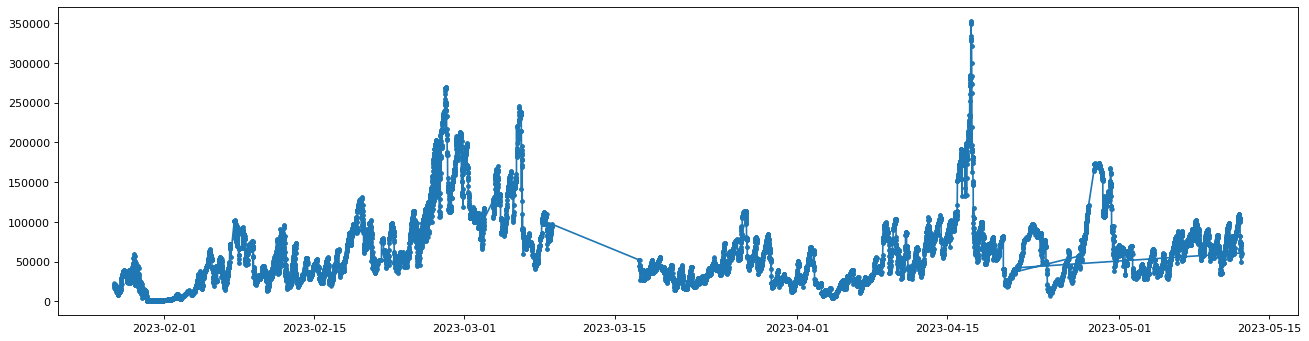

In [17]:
from matplotlib.pyplot import figure
start = 0
end = len(medium_df)
avg_job_queue_time = medium_df['avg_queue_time_per_job'][start:end]
time_index = medium_df.index[start:end]
figure(figsize=(20, 5), dpi=80)
plt.plot(time_index, avg_job_queue_time, marker='.')
plt.show()

Sort time index

In [18]:
medium_df.sort_index(inplace=True)

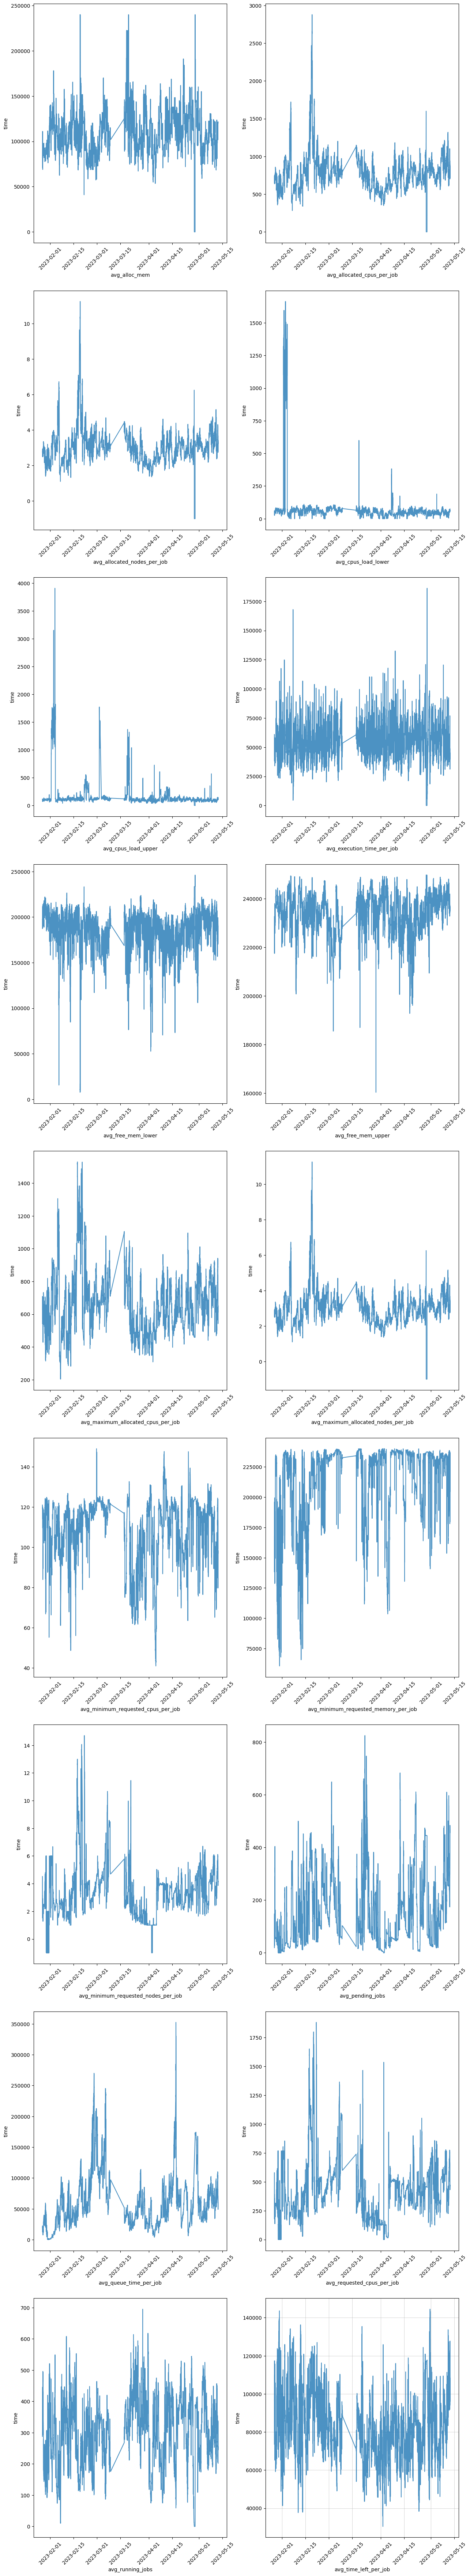

In [108]:
features = medium_df.columns
fig, axes = plt.subplots(9, 2, figsize=(15, 90))
row = 0
col = 0
for feature in medium_df.columns:
    axes[row, col].plot(medium_df.index, medium_df[feature],
        alpha=0.8
    )
    plt.grid(alpha=0.5)
    axes[row, col].tick_params(axis='x', rotation=45)
    axes[row, col].set(xlabel=feature, ylabel='time')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

4- Histograms for feature value distribution

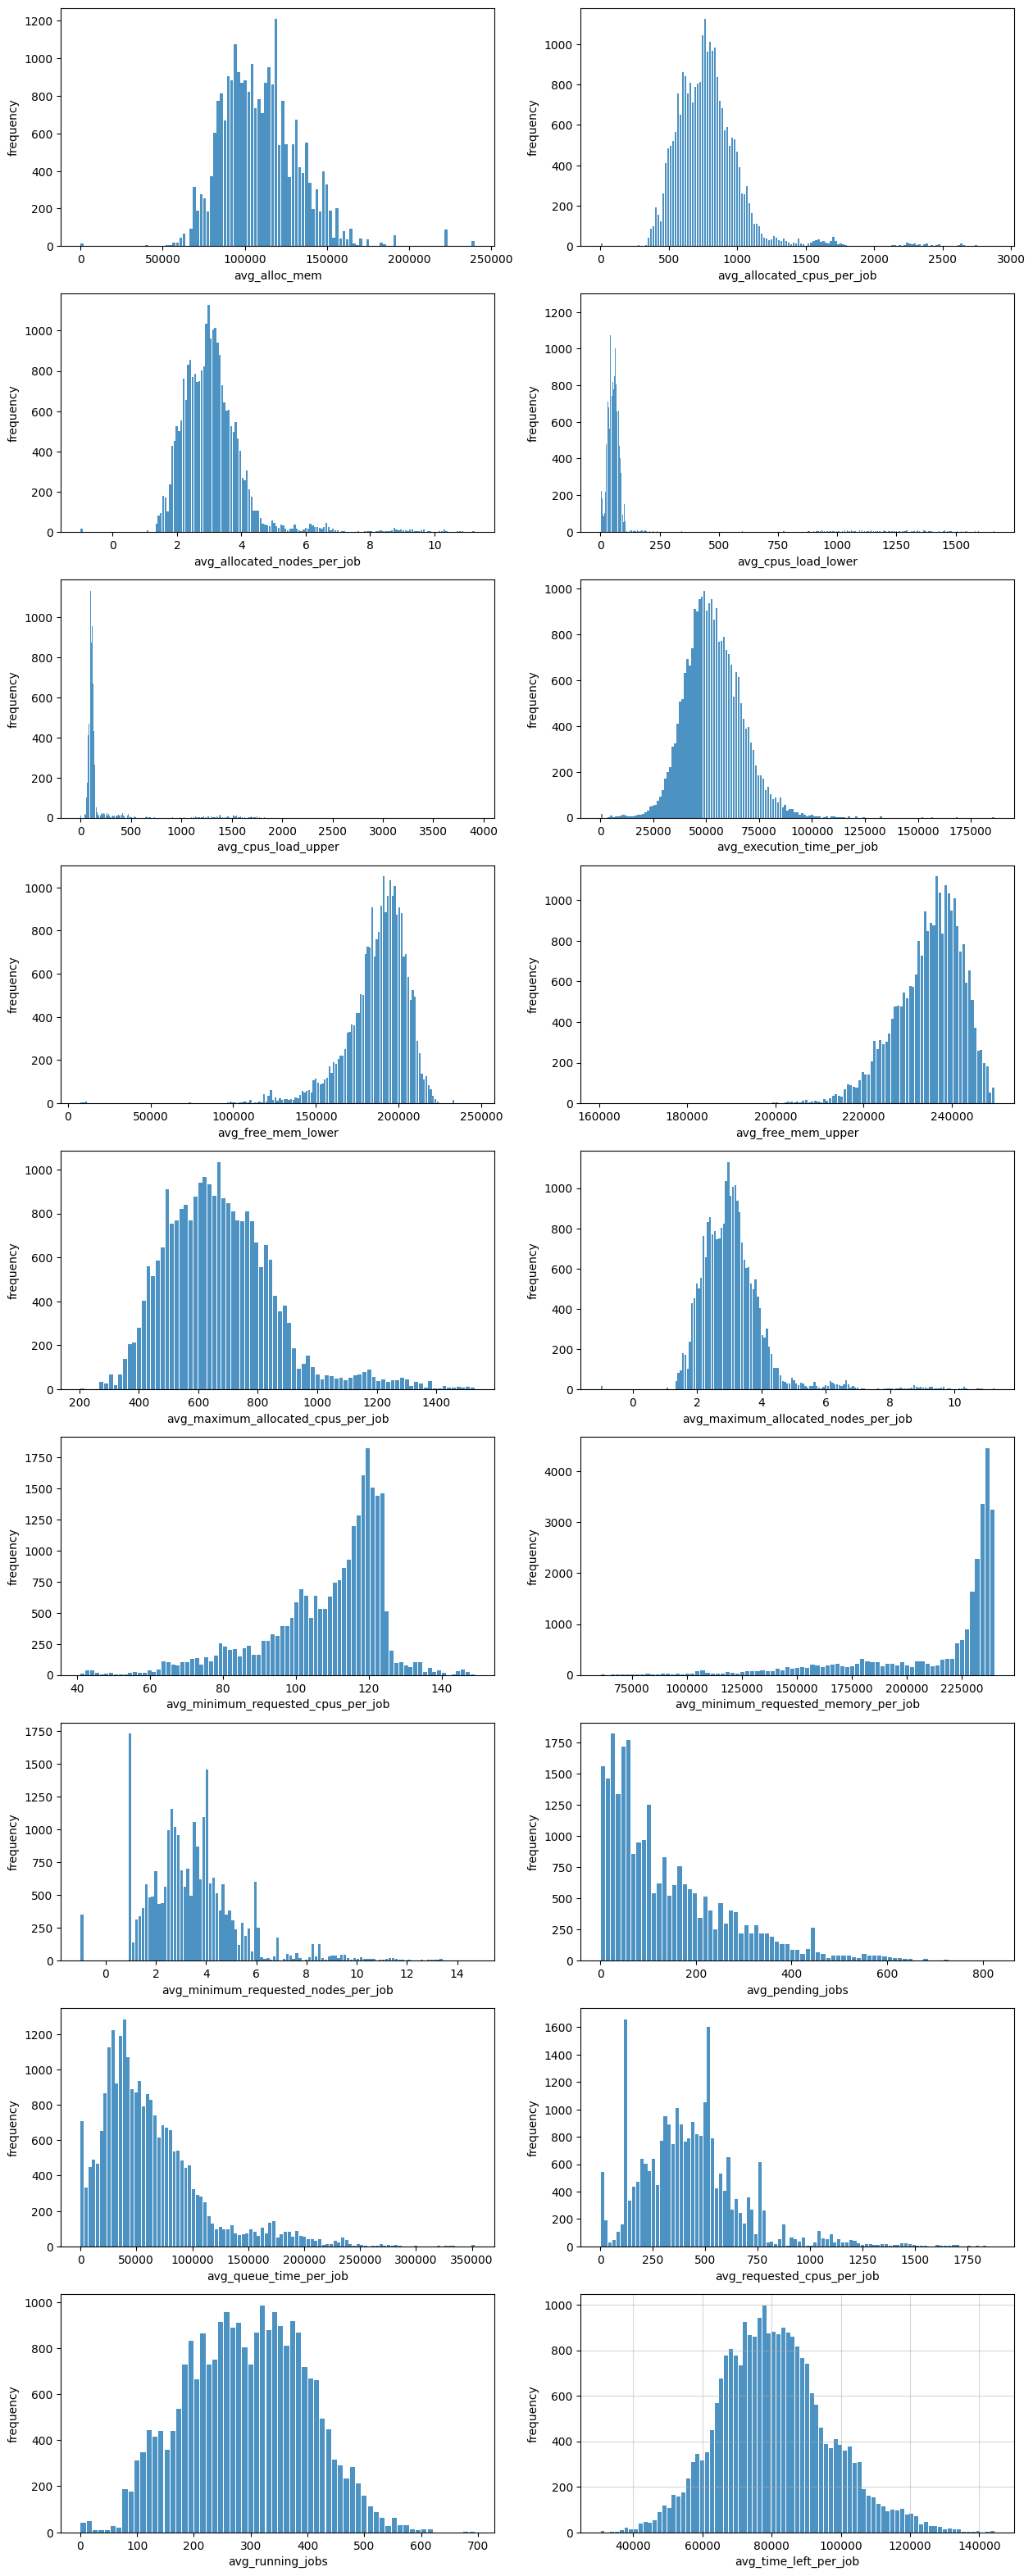

In [85]:
fig, axes = plt.subplots(9, 2, figsize=(15, 40))
row = 0
col = 0
for feature in medium_df.columns:
    n, bins, patches = axes[row, col].hist(
        x=medium_df[feature], bins='auto',
        alpha=0.8, rwidth=0.85
    )
    plt.grid(alpha=0.5)
    axes[row, col].set(xlabel=feature, ylabel='frequency')
    col = col + 1
    if col % 2 == 0:
        col = 0
        row = row + 1

5- Detection of outliers
Analysis of variance distribution of features with boxplot
It looks there are two groups of features, one with low variance, another one with large variance.
It the large variance group, some features shows outliers

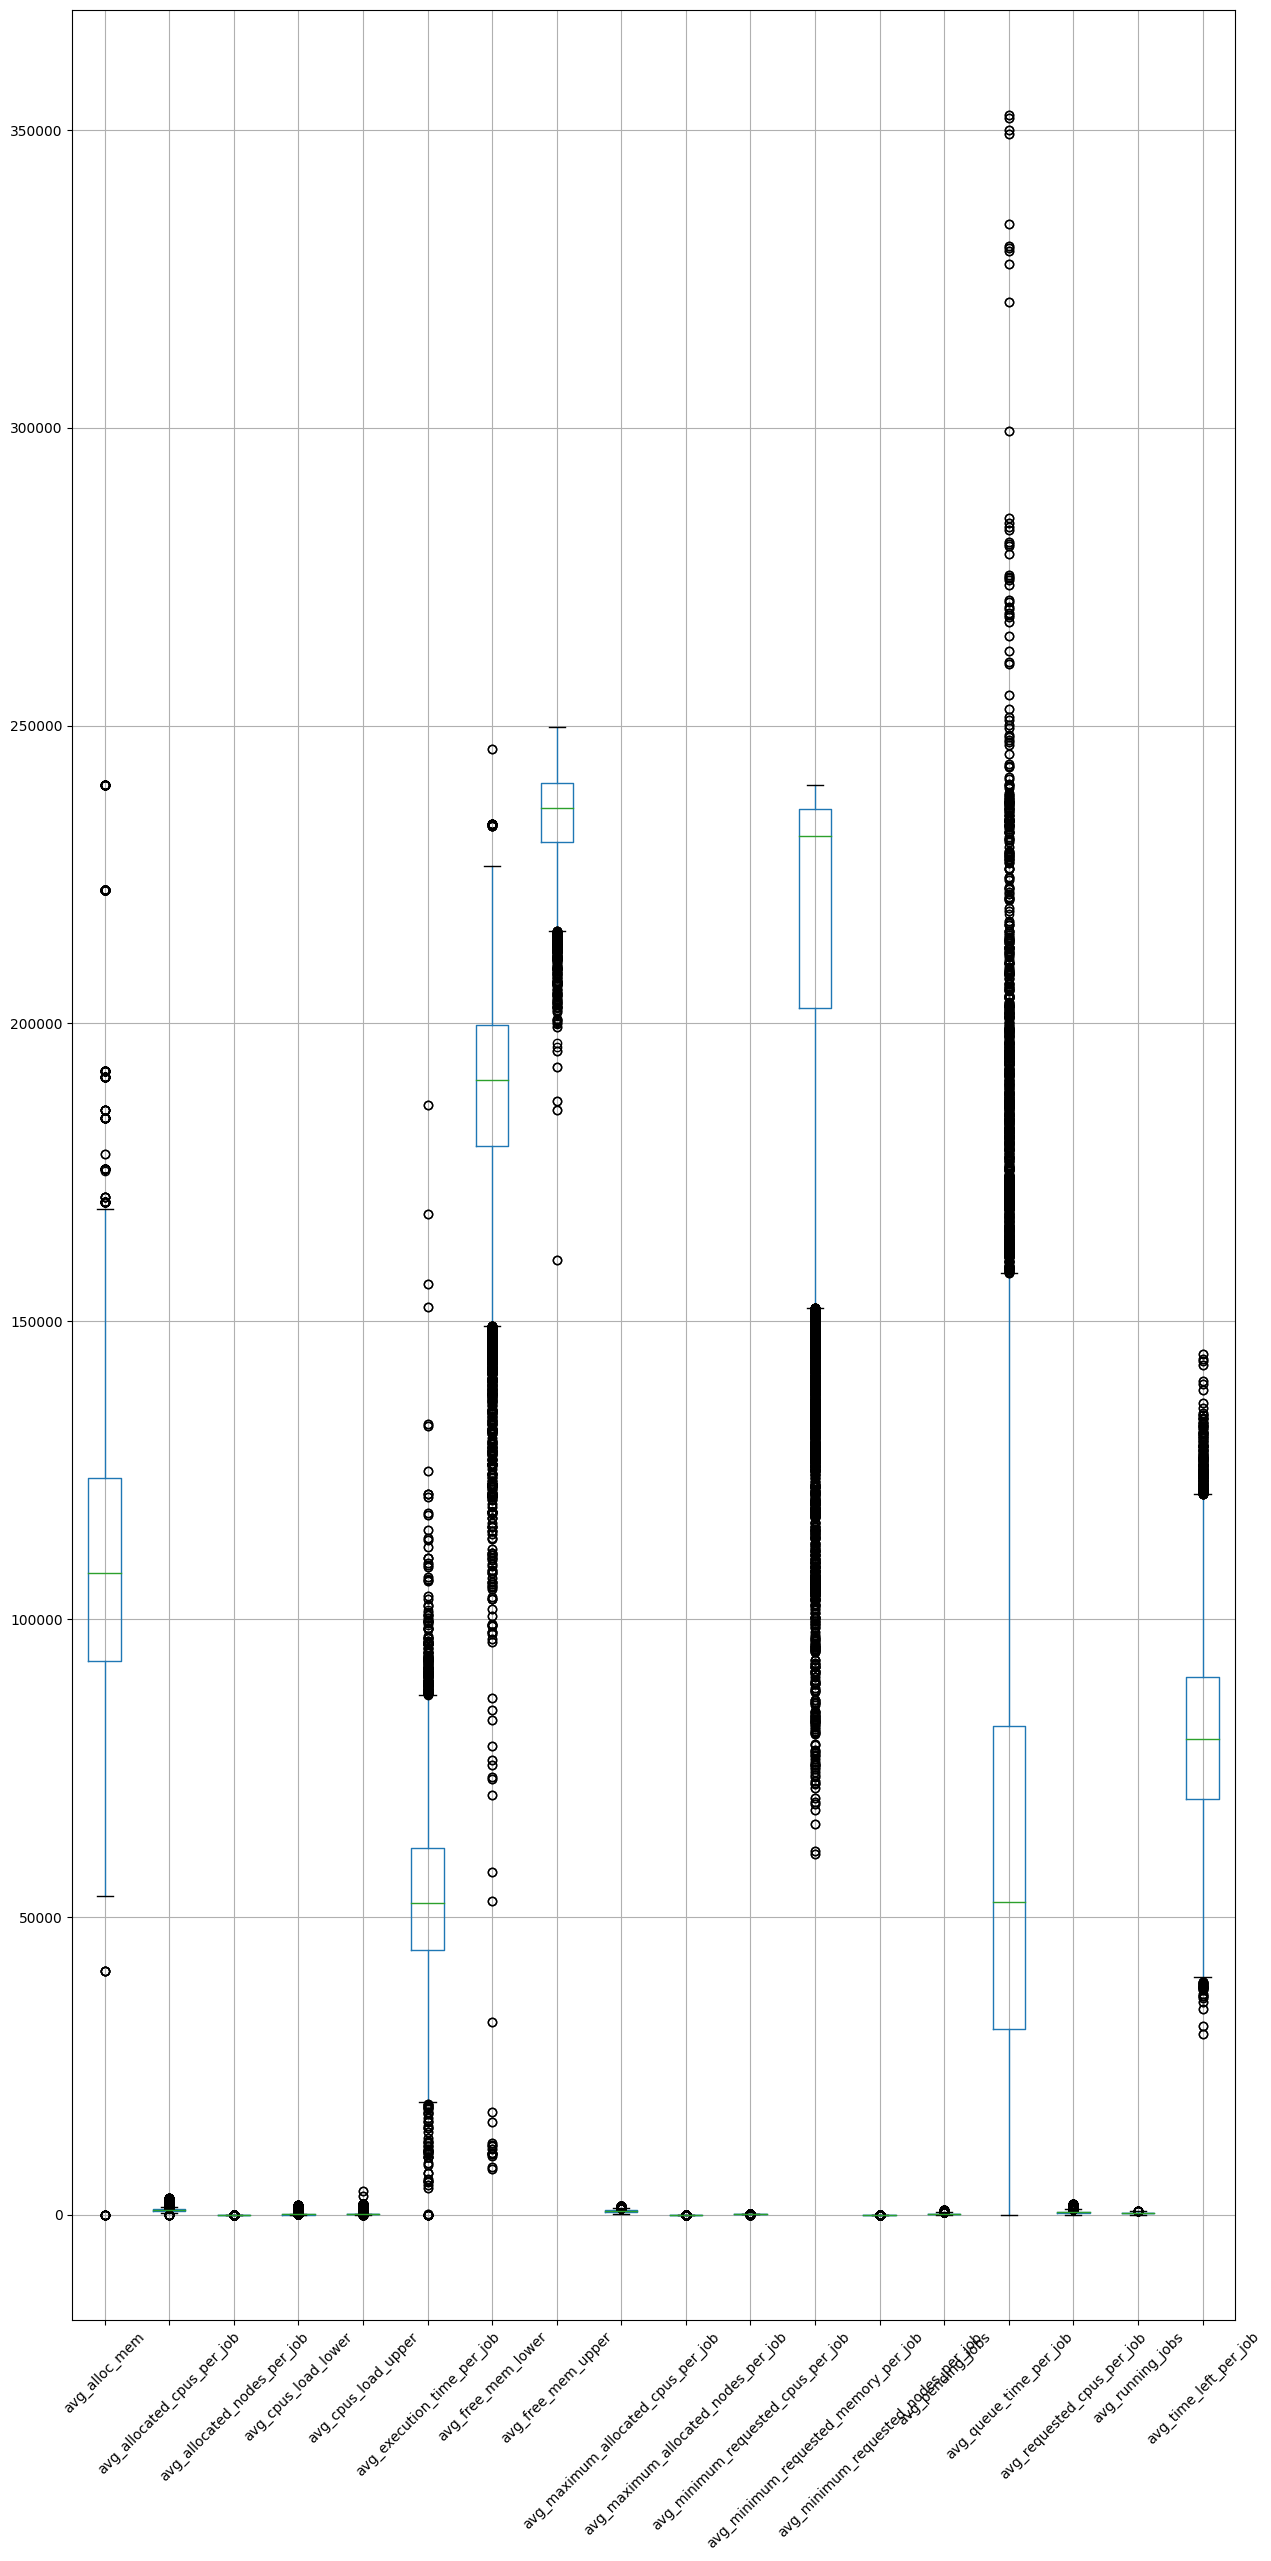

In [109]:
boxes = medium_df.boxplot(return_type='axes', figsize=(15, 30), rot=45)

Univariate outliers detection.
Applied to averaged running jobs

Outliers detection using Z-Scores (3 sigma)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)
outliers_rows, outliers_cols = np.where(np.abs(normalized_medium_df) > 3) # 3-sigma divergence
print (list(zip(outliers_rows, outliers_cols)))

[(469, 11), (470, 11), (483, 11), (484, 11), (491, 11), (492, 11), (505, 11), (506, 11), (513, 11), (514, 11), (519, 11), (520, 11), (527, 11), (528, 11), (533, 11), (534, 11), (541, 11), (542, 11), (547, 11), (548, 11), (549, 11), (550, 11), (555, 11), (556, 11), (559, 11), (560, 11), (561, 11), (562, 11), (563, 11), (564, 11), (569, 11), (570, 11), (571, 11), (572, 11), (575, 11), (576, 11), (577, 11), (578, 11), (579, 11), (580, 11), (583, 11), (584, 11), (585, 11), (586, 11), (589, 11), (590, 11), (591, 11), (592, 11), (603, 11), (604, 11), (605, 11), (606, 11), (611, 11), (612, 11), (615, 11), (616, 11), (617, 11), (618, 11), (619, 11), (620, 11), (625, 11), (626, 11), (633, 11), (634, 11), (639, 11), (640, 11), (653, 11), (654, 11), (667, 11), (668, 11), (675, 11), (676, 11), (681, 11), (682, 11), (689, 11), (690, 11), (695, 11), (696, 11), (703, 11), (704, 11), (709, 11), (710, 11), (717, 11), (718, 11), (731, 11), (732, 11), (739, 11), (740, 11), (747, 11), (748, 11), (753, 11)

Multivariate outliers detection

Elliptic Envelope
It requires data has normal distribution. 
TODO: investigate how to check normal distribution of data
TODO: further investigation of this approach for outliers detection is required, how to be applied to dataframes with multiple features, and
how to render outliers. In Python Data Science Essentials book, Elliptic Envelope technique is applied on dataset after PCA analysis for 2 components

In [20]:
normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')].shape

(25708,)

/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-119.118832692521721 > -158.576458603276592). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-145.752067530095019 > -147.508726590547496). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this shou

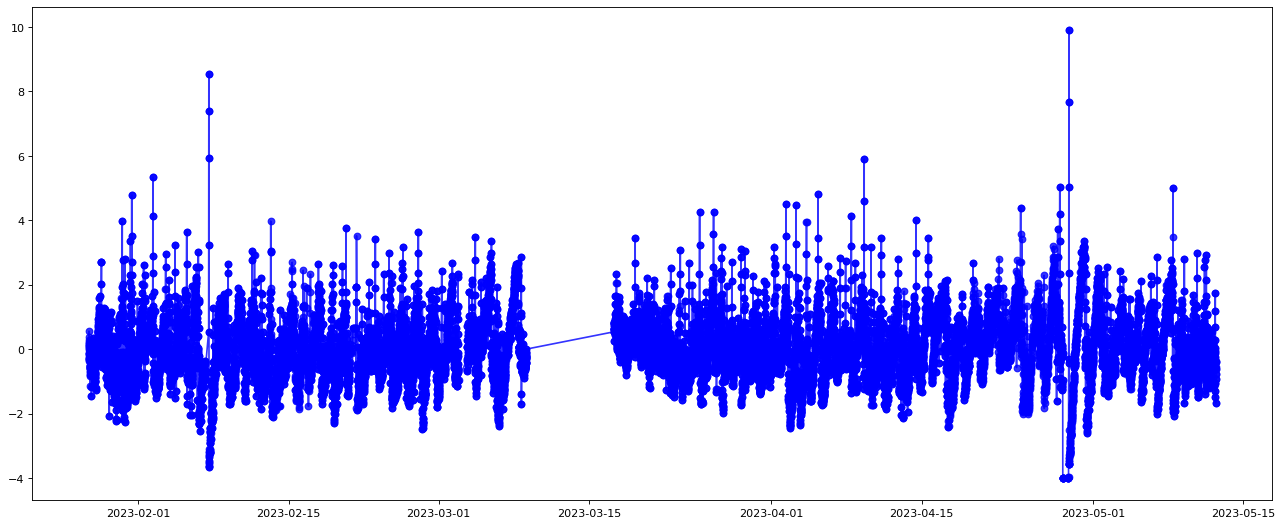

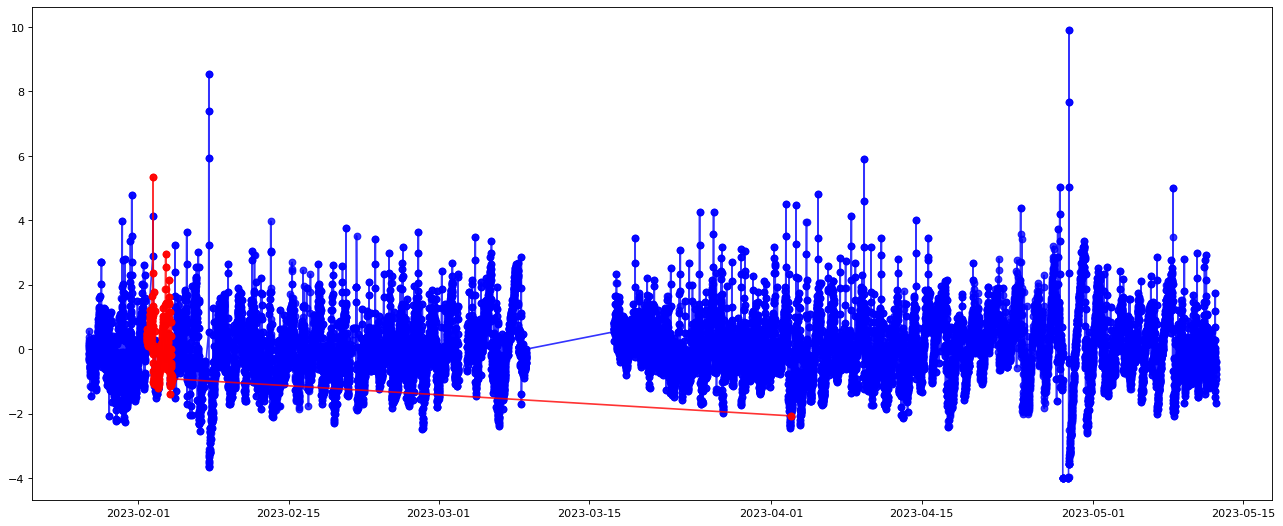

In [21]:
from sklearn.covariance import EllipticEnvelope
from matplotlib.pyplot import figure
from sklearn.preprocessing import StandardScaler

#Normalize data (required by EllipticEnvelope)
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)

robust_covariance_estimation = EllipticEnvelope(contamination=0.02).fit(normalized_medium_df)
detection = robust_covariance_estimation.predict(normalized_medium_df)
outliers = np.where(detection == -1)[0]
inliers = np.where(detection == 1)[0]
#Plot data series
figure(figsize=(20, 8), dpi=80)
plt.plot(medium_df.index, normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')], c='blue', alpha=0.8, marker='o')
plt.show()
#Plot outliers/inliers
# The distribution and the outliers
figure(figsize=(20, 8), dpi=80)
in_points = plt.plot(medium_df.index[inliers], normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')][inliers],
    c='blue', alpha=0.8, marker='o')
out_points = plt.plot(medium_df.index[outliers], normalized_medium_df.transpose()[medium_df.columns.get_loc('avg_execution_time_per_job')][outliers],
    c='red', alpha=0.8, marker='o')



PCA decomposition followed by Elliptic Envelope, using code from Python data science essentials book
The presence of clusters in data is not an optimal situation for Elliptic Envelope

/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:647: UserWarning: The covariance matrix associated to your dataset is not full rank
  warnings.warn("The covariance matrix associated to your dataset "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-138.371492397256873 > -143.487431977005059). You may want to try with a higher value of support_fraction (current value: 0.503).
  warnings.warn("Determinant has increased; this should not happen: "
/home/yosu/.local/lib/python3.8/site-packages/sklearn/covariance/_robust_covariance.py:166: RuntimeWarning: Determinant has increased; this should not happen: log(det) > log(previous_det) (-111.471813655649413 > -140.115710198451268). You may want to try with a higher value of support_fraction (current value: 0.501).
  warnings.warn("Determinant has increased; this shou

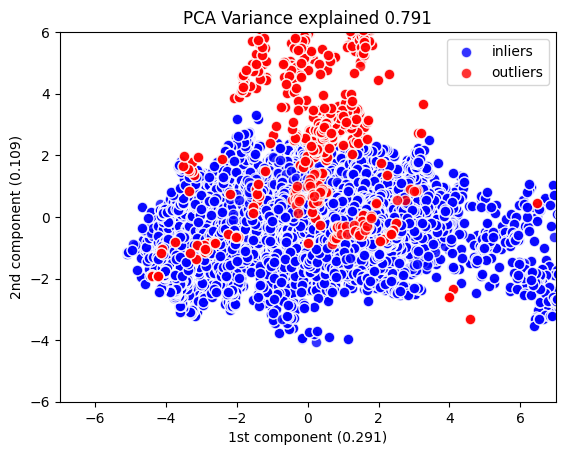

In [22]:
# PCA decomposition
from sklearn.decomposition import PCA

pca = PCA(n_components=7)
Zscore_components = pca.fit_transform(normalized_medium_df)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))
v1 = str(round(pca.explained_variance_ratio_[0],3))
v2 = str(round(pca.explained_variance_ratio_[1],3))

robust_covariance_est = EllipticEnvelope(store_precision=False, assume_centered = False, contamination=.05)
robust_covariance_est.fit(normalized_medium_df)
detection = robust_covariance_est.predict(normalized_medium_df)
outliers = np.where(detection==-1)
regular = np.where(detection==1)

in_points = plt.scatter(Zscore_components[regular,0], Zscore_components[regular,1], c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
out_points = plt.scatter(Zscore_components[outliers,0], Zscore_components[outliers,1], c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
plt.legend((in_points,out_points),('inliers','outliers'), scatterpoints=1, loc='best')
plt.xlabel('1st component ('+v1+')')
plt.ylabel('2nd component ('+v2+')')
plt.xlim([-7,7])
plt.ylim([-6,6])
plt.title(vtot)
plt.show()

OneClassSVM

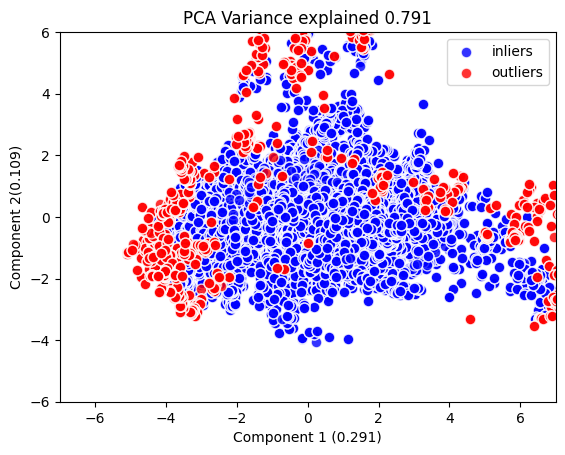

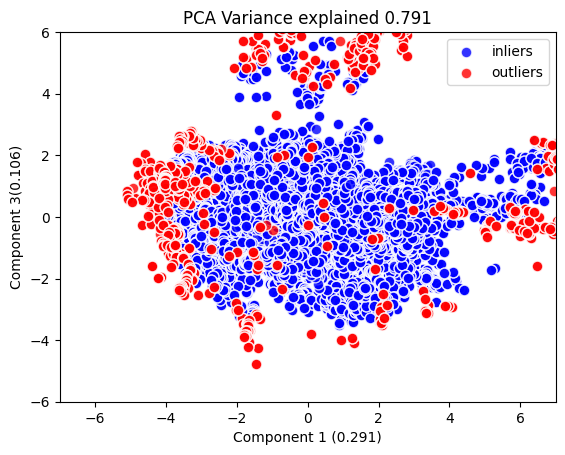

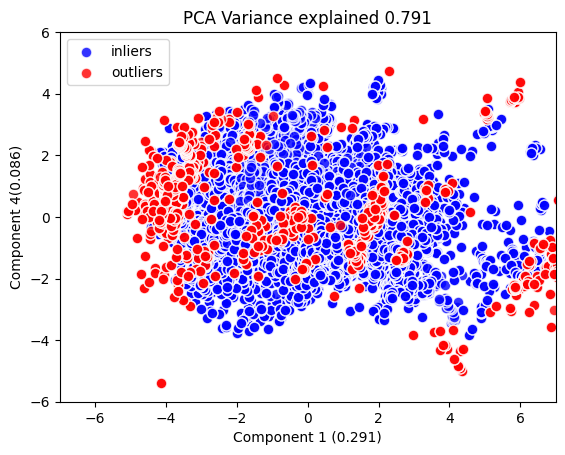

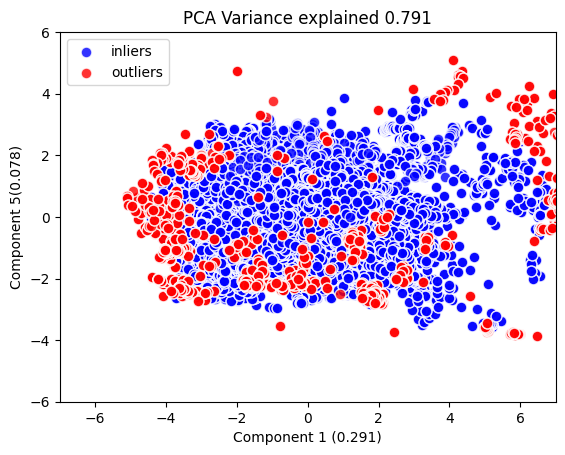

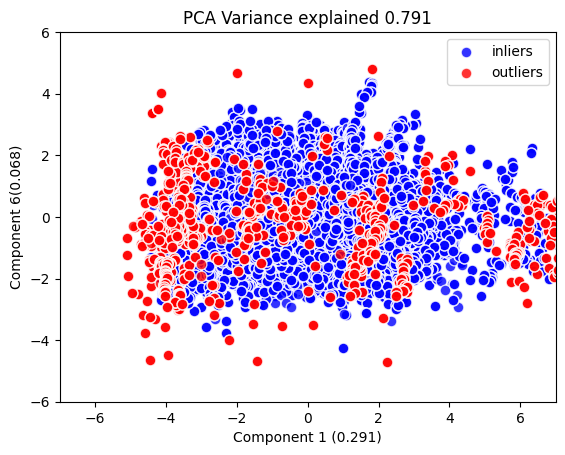

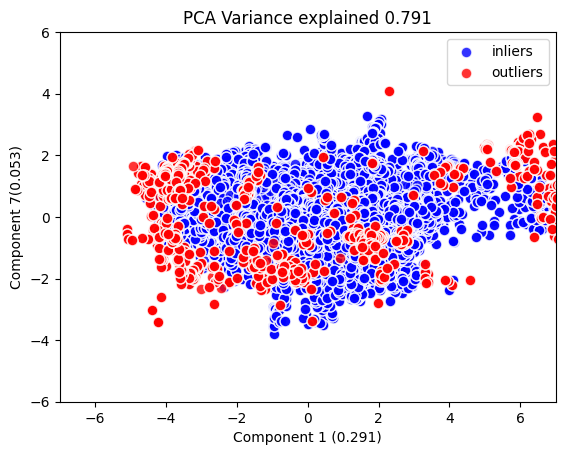

In [23]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import OneClassSVM

#Normalize data (required by OneClassSVM)
scaler = StandardScaler()
normalized_medium_df = scaler.fit_transform(medium_df)

# PCA decomposition
pca = PCA(n_components=7)
Zscore_components = pca.fit_transform(normalized_medium_df)
vtot = 'PCA Variance explained ' + str(round(np.sum(pca.explained_variance_ratio_),3))

# OneClassSVM fitting and estimates
outliers_fraction = 0.02
nu_estimate = 0.95 * outliers_fraction + 0.05
gamma_estimate=1.0/len(normalized_medium_df)

oneclasssvm = OneClassSVM(kernel="rbf", gamma=gamma_estimate, degree=3, nu=nu_estimate)
oneclasssvm.fit(normalized_medium_df)
detection = oneclasssvm.predict(normalized_medium_df)
outliers = np.where(detection == -1)
regular = np.where(detection == 1)

# Visualization of data and outliers
for r in range(1,7):
    in_points = plt.scatter(Zscore_components[regular,0], Zscore_components[regular,r],
        c='blue', alpha=0.8, s=60, marker='o', edgecolors='white')
    out_points = plt.scatter(Zscore_components[outliers,0], Zscore_components[outliers,r],
        c='red', alpha=0.8, s=60, marker='o', edgecolors='white')
    plt.legend((in_points,out_points),('inliers','outliers'), scatterpoints=1, loc='best')
    plt.xlabel('Component 1 (' + str(round(pca.explained_variance_ratio_[0],3))+')')
    plt.ylabel('Component '+str(r+1)+'('+str(round(pca.explained_variance_ratio_[r],3))+')')
    plt.xlim([-7,7])
    plt.ylim([-6,6])
    plt.title(vtot)
    plt.show()


6- Correlation between features
Correlation matrix computed by pandas

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job')]

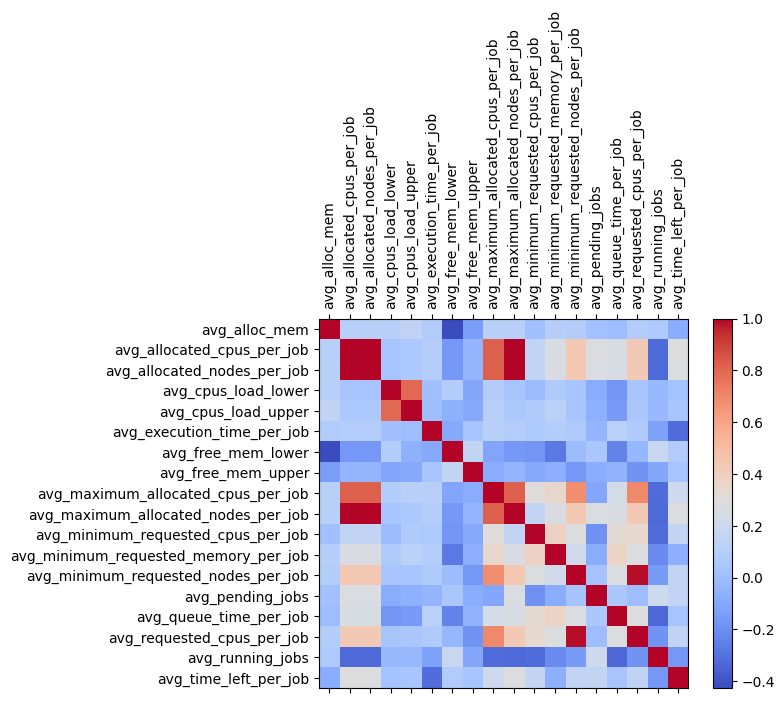

In [25]:
features = medium_df.columns
correlation_matrix = medium_df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cmf = ax.matshow(correlation_matrix, cmap='coolwarm')
fig.colorbar(cmf)
plt.xticks(rotation=90)
xaxis = np.arange(len(features))
ax.set_xticks(xaxis)
ax.set_yticks(xaxis)
ax.set_xticklabels(features)
ax.set_yticklabels(features)

Correlation matrix computed by numpy (covariance matrix, Pearson)

[Text(0, 0, 'avg_alloc_mem'),
 Text(0, 1, 'avg_allocated_cpus_per_job'),
 Text(0, 2, 'avg_allocated_nodes_per_job'),
 Text(0, 3, 'avg_cpus_load_lower'),
 Text(0, 4, 'avg_cpus_load_upper'),
 Text(0, 5, 'avg_execution_time_per_job'),
 Text(0, 6, 'avg_free_mem_lower'),
 Text(0, 7, 'avg_free_mem_upper'),
 Text(0, 8, 'avg_maximum_allocated_cpus_per_job'),
 Text(0, 9, 'avg_maximum_allocated_nodes_per_job'),
 Text(0, 10, 'avg_minimum_requested_cpus_per_job'),
 Text(0, 11, 'avg_minimum_requested_memory_per_job'),
 Text(0, 12, 'avg_minimum_requested_nodes_per_job'),
 Text(0, 13, 'avg_pending_jobs'),
 Text(0, 14, 'avg_queue_time_per_job'),
 Text(0, 15, 'avg_requested_cpus_per_job'),
 Text(0, 16, 'avg_running_jobs'),
 Text(0, 17, 'avg_time_left_per_job')]

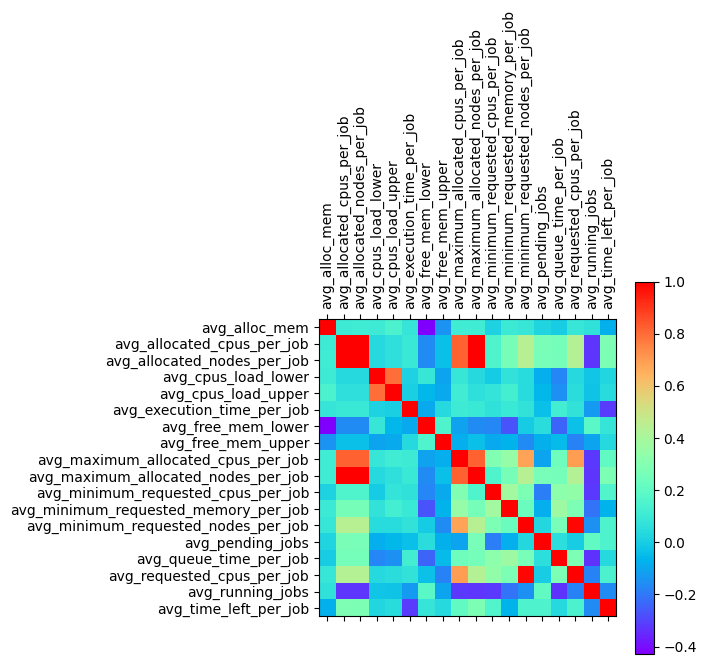

In [26]:
cov_data = np.corrcoef(medium_df.T)
img = plt.matshow(cov_data, cmap=plt.cm.rainbow)
fig.colorbar(img)
#plt.xticks(rotation=90)
#fig.autofmt_xdate(rotation=45)
xaxis = np.arange(len(features))
img.axes.set_xticks(xaxis)
img.axes.set_yticks(xaxis)
img.axes.set_xticklabels(features, rotation = 90)
img.axes.set_yticklabels(features)

7- Dimensionality reduction
Target: averaged_queue_time_per_job

PCA: Principal component analysis

In [27]:
from sklearn.decomposition import PCA
pca_2c = PCA(n_components=2)
X_pca_2c = pca_2c.fit_transform(medium_df)
X_pca_2c.shape

(25708, 2)

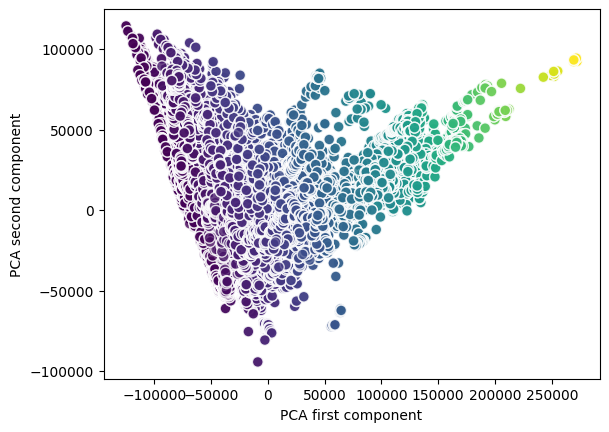

0.7189051612161462

In [28]:
plt.scatter(X_pca_2c[:,0], X_pca_2c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("PCA first component")
plt.ylabel("PCA second component")
plt.show()
pca_2c.explained_variance_ratio_.sum()

In [29]:
pca_3c = PCA(n_components=3)
X_pca_3c = pca_3c.fit_transform(medium_df)
X_pca_3c.shape

(25708, 3)

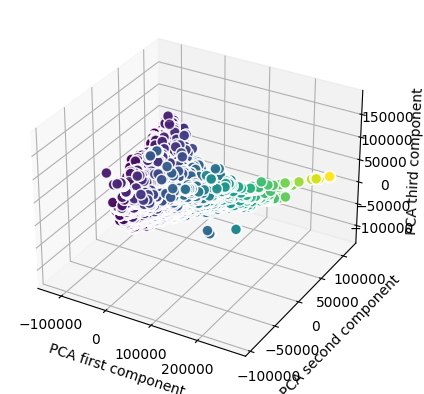

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_3c[:,0], X_pca_3c[:,1], X_pca_3c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()

In above 2D and 3D scatter plots we can see how the average job queue_time mostly scales with the first PCA component

We can determine the optimal number of principal components. With n=6 we get 0.98 of total variance, with n=7, the 0.9999

First computation, iterating over an increasing number of components (up to the number of features)

In [31]:
for n in range(1,len(features)):
    pca_nc = PCA(n_components=n)
    X_pca_nc = pca_nc.fit_transform(medium_df)
    print ('n={}, variance_ratio_sum: {}'.format(n, pca_nc.explained_variance_ratio_.sum()))

n=1, variance_ratio_sum: 0.5244479322978666
n=2, variance_ratio_sum: 0.7189051612161463
n=3, variance_ratio_sum: 0.8515661735019556
n=4, variance_ratio_sum: 0.9122897768755305
n=5, variance_ratio_sum: 0.9590895852570989
n=6, variance_ratio_sum: 0.9883088515832139
n=7, variance_ratio_sum: 0.9999505502896819
n=8, variance_ratio_sum: 0.9999697905087891
n=9, variance_ratio_sum: 0.9999851644987179
n=10, variance_ratio_sum: 0.9999926988055253
n=11, variance_ratio_sum: 0.9999964433481978
n=12, variance_ratio_sum: 0.9999980580403612
n=13, variance_ratio_sum: 0.9999995597701777
n=14, variance_ratio_sum: 0.9999999626839203
n=15, variance_ratio_sum: 0.999999999984301
n=16, variance_ratio_sum: 0.999999999999786
n=17, variance_ratio_sum: 1.0000000000000002


Second computation, requesting to obtain 0.99 total variance
Similarly, it determines 7 pca components as optimal

In [32]:
pca = PCA(n_components=0.99)
X_pca = pca.fit_transform(medium_df)
pca.explained_variance_ratio_.sum(), X_pca.shape

(0.999950550289683, (25708, 7))

Third computation uses a randomized SVD algorithm, intended to speed up computation on large dataset
Similar results are obtained, but much faster for large datasets

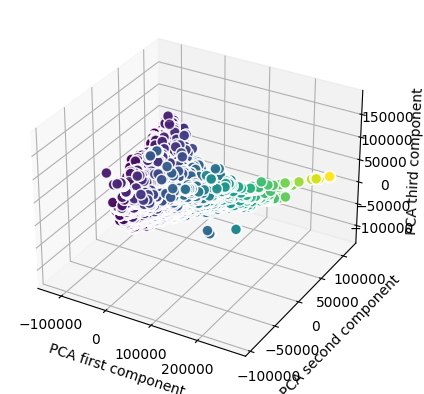

(0.999950550289683, (25708, 7))

In [33]:
pca_7c = PCA(svd_solver='randomized', n_components=7)
X_pca_7c = pca_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_pca_7c[:,0], X_pca_7c[:,1], X_pca_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('PCA first component')
ax.set_ylabel('PCA second component')
ax.set_zlabel('PCA third component')
plt.show()
pca.explained_variance_ratio_.sum(), X_pca_7c.shape

LFA: Latent factor analysis
Obtain another non-orthogonal proyection of features to reduce dimensionality 

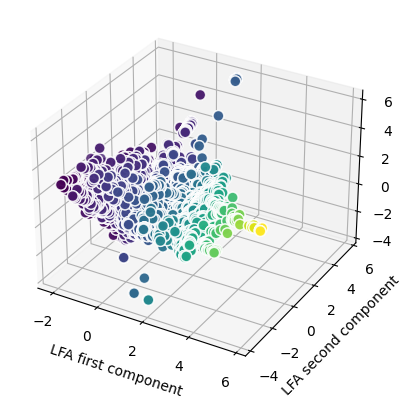

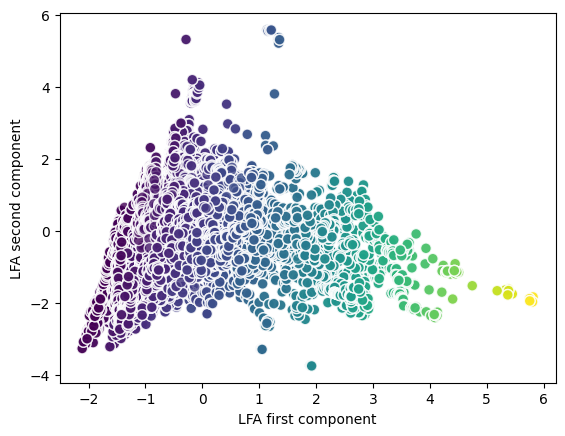

In [34]:
from sklearn.decomposition import FactorAnalysis
fa_7c = FactorAnalysis(n_components=7)
X_fa_7c = fa_7c.fit_transform(medium_df)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_fa_7c[:,0], X_fa_7c[:,1], X_fa_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('LFA first component')
ax.set_ylabel('LFA second component')
ax.set_zlabel('LFA third component')
plt.show()

plt.scatter(X_fa_7c[:,0], X_fa_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("LFA first component")
plt.ylabel("LFA second component")
plt.show()

Linear Discriminant Analysys
It requires categorical labels. Target average queue time is convert into categorical by using pandas cut and 10 bin to distribute target data.

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import math
X_features = features.drop('avg_queue_time_per_job')
target = features == 'avg_queue_time_per_job'
y_features = features[target]
X = medium_df[X_features].to_numpy()
y = medium_df[y_features]
step = math.floor((y.max() - y.min())/10)
bins = range(math.floor(y.min()), math.ceil(y.max()), step)
y = pd.cut(x=medium_df[y_features].to_numpy().flatten(), bins=bins, labels=range(10))
y = y.fillna(method='pad')
lda_7c = LDA(n_components=7)
X_lda_7c = lda_7c.fit_transform(X, y)

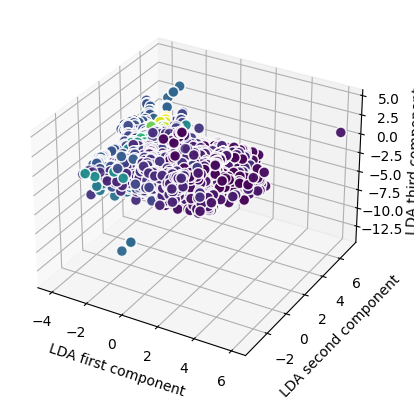

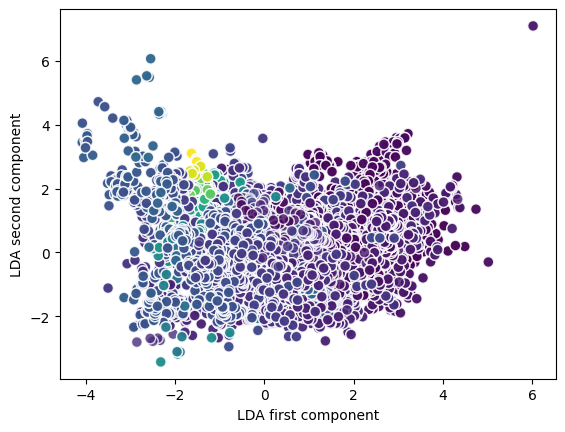

In [36]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_lda_7c[:,0], X_lda_7c[:,1], X_lda_7c[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('LDA first component')
ax.set_ylabel('LDA second component')
ax.set_zlabel('LDA third component')
plt.show()

plt.scatter(X_lda_7c[:,0], X_lda_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("LDA first component")
plt.ylabel("LDA second component")
plt.show()

Kernel-PCA
Kernel PCA is a technique that uses a kernel to map the signal on a (typically) nonlinear
space and makes it linearly separable

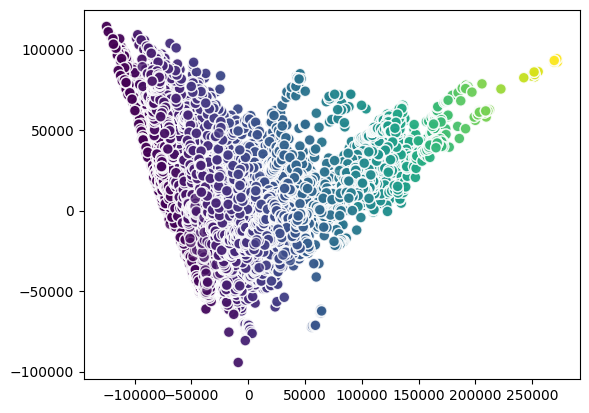

In [37]:
from sklearn.decomposition import KernelPCA

kpca_7c = KernelPCA(n_components=7, kernel='linear')
X_lda_7c = kpca_7c.fit_transform(medium_df)
plt.scatter(X_lda_7c[:,0], X_lda_7c[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8, s=60, marker='o', edgecolors='white')
plt.show()

T-distributed stochastic neighbor embedding (T-SNE)

In [38]:
from sklearn.manifold import TSNE
X_tsne = TSNE(n_components=3).fit_transform(medium_df)

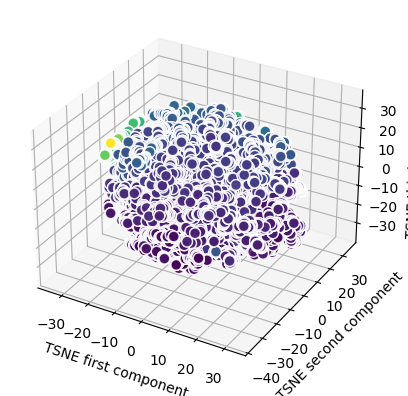

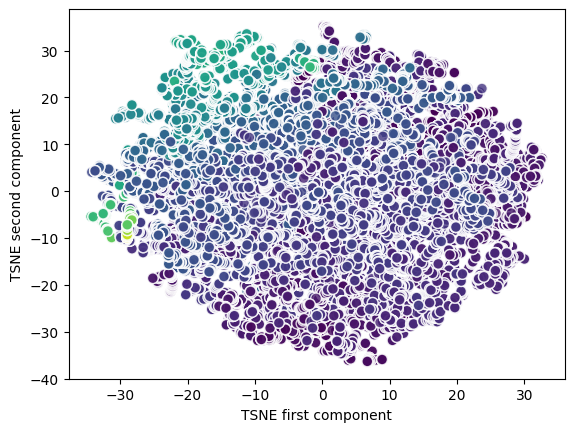

In [39]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_tsne[:,0], X_tsne[:,1], X_tsne[:,2], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
ax.set_xlabel('TSNE first component')
ax.set_ylabel('TSNE second component')
ax.set_zlabel('TSNE third component')
plt.show()

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=medium_df['avg_queue_time_per_job'], alpha=0.8,
    s=60, marker='o', edgecolors='white')
plt.xlabel("TSNE first component")
plt.ylabel("TSNE second component")
plt.show()

8- Feature selection

- Selection based on the variance
- Univariate selection
- Recursive elimination
- Randomized logistic regression/stability selection (deprecated)
- L1-based feature selection (deprecated)

TODO: investigate feature seleccion methods


- Selection based on the variance
It removes all the features which have small variance

In [43]:
from sklearn.feature_selection import VarianceThreshold
medium_df_selected = VarianceThreshold(threshold=1.0).fit_transform(medium_df)
medium_df.describe().transpose()
# These columns should have been removed from dataset: avg_allocated_nodes_per_job, avg_maximum_allocated_nodes_per_job, avg_minimum_requested_nodes_per_job

count           mean           std  \
avg_alloc_mem                         25708.0  109820.712528  23468.654668   
avg_allocated_cpus_per_job            25708.0     786.394447    250.065269   
avg_allocated_nodes_per_job           25708.0       3.071311      0.978800   
avg_cpus_load_lower                   25708.0      76.814262    168.933019   
avg_cpus_load_upper                   25708.0     167.554043    242.202998   
avg_execution_time_per_job            25708.0   53398.963446  13401.336650   
avg_free_mem_lower                    25708.0  187403.889372  18781.242197   
avg_free_mem_upper                    25708.0  234923.756764   7533.645046   
avg_maximum_allocated_cpus_per_job    25708.0     671.881426    184.698289   
avg_maximum_allocated_nodes_per_job   25708.0       3.071311      0.978800   
avg_minimum_requested_cpus_per_job    25708.0     108.676288     16.093355   
avg_minimum_requested_memory_per_job  25708.0  214627.652140  33484.517983   
avg_minimum_requested_nodes_per_job   25708.0       3.470303      1.899406   
avg_pending_jobs                      25708.0     140.702661    127.703127   
avg_queue_time_per_job                25708.0   63080.345636  46296.386839   
avg_requested_cpus_per_job            25708.0     432.222691    249.662831   
avg_running_jobs                      25708.0     293.813327    105.852869   
avg_time_left_per_job                 25708.0   80839.454920  15785.867529   

                                                min            25%  \
avg_alloc_mem                              0.000000   92980.000000   
avg_allocated_cpus_per_job                -1.000000     625.678322   
avg_allocated_nodes_per_job               -1.000000       2.444056   
avg_cpus_load_lower                        0.000000      36.366000   
avg_cpus_load_upper                        0.020000      95.055125   
avg_execution_time_per_job                -1.000000   44523.394166   
avg_free_mem_lower                      7658.000000  179463.487500   
avg_free_mem_upper                    160283.750000  230433.888889   
avg_maximum_allocated_cpus_per_job       203.279597     539.899576   
avg_maximum_allocated_nodes_per_job       -1.000000       2.444056   
avg_minimum_requested_cpus_per_job        40.965278     100.820494   
avg_minimum_requested_memory_per_job   60568.814480  202547.222378   
avg_minimum_requested_nodes_per_job       -1.000000       2.340178   
avg_pending_jobs                           0.000000      44.000000   
avg_queue_time_per_job                     1.342995   31236.781182   
avg_requested_cpus_per_job                -1.000000     262.826389   
avg_running_jobs                           0.000000     216.000000   
avg_time_left_per_job                  30428.407407   69880.526978   

                                                50%            75%  \
avg_alloc_mem                         107766.400000  123700.000000   
avg_allocated_cpus_per_job               764.271845     891.785421   
avg_allocated_nodes_per_job                2.985437       3.483537   
avg_cpus_load_lower                       52.507917      68.061250   
avg_cpus_load_upper                      110.618333     130.167625   
avg_execution_time_per_job             52387.769912   61606.734940   
avg_free_mem_lower                    190560.714286  199657.000000   
avg_free_mem_upper                    236088.500000  240407.025000   
avg_maximum_allocated_cpus_per_job       655.960591     774.701571   
avg_maximum_allocated_nodes_per_job        2.985437       3.483537   
avg_minimum_requested_cpus_per_job       113.756863     120.081916   
avg_minimum_requested_memory_per_job  231458.812227  236067.187328   
avg_minimum_requested_nodes_per_job        3.310345       4.238806   
avg_pending_jobs                         101.000000     203.000000   
avg_queue_time_per_job                 52585.930921   82004.160526   
avg_requested_cpus_per_job               412.610909     541.561254   
avg_running_jobs                    

In [41]:
def determine_dropped_colums(df: pd.core.frame.DataFrame, df_selected: np.ndarray):
    original_columns = df.columns
    dropped_columns = []
    index = -1
    for value in df.iloc[0]:
        index += 1
        if value not in df_selected[0]:
            dropped_columns.append(original_columns[index])
    return dropped_columns

dropped_columns = determine_dropped_colums(medium_df, medium_df_selected)
dropped_columns

['avg_allocated_nodes_per_job', 'avg_maximum_allocated_nodes_per_job']

- Univariate selection
selects single variables that are associated the most with your target variable according to a statistical test.
There are three available tests:
- The f_regression object uses an F-test and a p-value according to the ratio of explained variance against the unexplained one in a linear regression of the variable with the target. This is only useful for regression problems.
- The f_classif object is an ANOVA F test that can be used when dealing with classification problems.
- The Chi2 object is a chi-squared test, which is suitable when the target is a classification and the variables are count or binary data (they should be positive).
All of the tests have a score and a p-value. Higher scores and p-values indicate that the variable is associated and is consequently useful to the target.
In order to automate the procedure, there are also some selection routines available:
- SelectKBest, based on the score of the test, takes the k best variables.
- SelectPercentile, based on the score of the test, takes the top percentile of performing variables.
- Based on the p-values of the tests, SelectFpr (false positive rate test), SelectFdr (false discovery rate test), and SelectFwe (family-wise error rate procedure).

Using SelectPercentile with f_regression, we determine the top 25% features on forecasting with regression the "avg_queue_time_per_job" target
Selected features are: 'avg_running_jobs', 'node_alloc', 'node_idle', 'node_total', 'nodes'

In [44]:
from sklearn.feature_selection import SelectPercentile, f_regression

X_columns = medium_df.columns.drop("avg_queue_time_per_job")
X = medium_df[X_columns]
y = medium_df["avg_queue_time_per_job"]

selector_f_regression = SelectPercentile(f_regression, percentile=25).fit(X, y)
selected = selector_f_regression.get_support()
print ("Selected features: ")
print (X.columns[selected])


Selected features: 
Index(['avg_minimum_requested_cpus_per_job',
       'avg_minimum_requested_memory_per_job', 'avg_requested_cpus_per_job',
       'avg_running_jobs'],
      dtype='object')


- Recursive elimination (Recursive Feature Elimination and Cross-Validated selection)
The problem with univariate selection is the likelihood of selecting a subset containing
redundant information. In this case, recursive elimination could help

As a rule, when you notice a large discrepancy between the training results (based on cross-
validation, not the in-sample score) and the out-of-sample results, recursive selection can
help you achieve better performance from your learning algorithms by pointing out some
of the most important variables

TODO: further investigate this technique once concrete regression models are decided.

In [45]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()
selector = RFECV(estimator=regressor, step=1, cv=10, scoring='r2')
selector.fit(X, y)
print('Optimal number of features: %d' % selector.n_features_)

Optimal number of features: 2


- Randomized logistic regression/stability selection (deprecated, not available anymore in sklearn)

Using Lasso regressor
TODO: Investigate Lasso regressor as a feature selection method




In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
regressor = Lasso(alpha=0.3, normalize=True)
regressor.fit(X_train, y_train)
print ('Out-of-sample accuracy: %0.3f' %regressor.score(X_test, y_test))

Out-of-sample accuracy: 0.329


Data pipeline:
1- Serial pipeline: using sklearn.pipeline.Pipeline
2- Parallel pipeline: using sklearn.pipeline.FeatureUnion it can also parallelise a sequence pipeline

serial and parallel pipelines can be combined
See chapter3 (last section) of Python Data Science Essentials book

Possible example of EDA (Exploratory Data Analysis)
1- read dataset
2- split dataset (train, test)
3- Parallel:
    - dataset dimensionality reduction:
        - PCA
        - KernelPCA
4- Sequence:
    - feature selection:
        - Stability and L1 selection
    - model training

Combine this pipeline with sklearn.model_selection.GridSearchCV to conduct a hyperparameter search

Time series analysis of medium partition
Based on techniques from book: Time series forecasting in Python


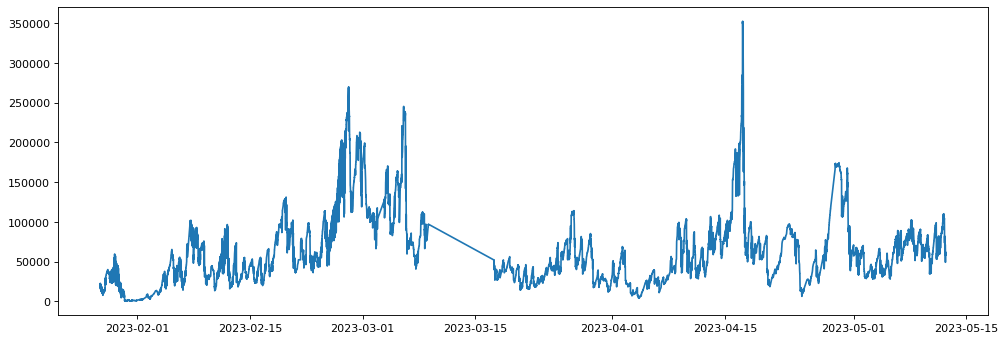

In [8]:
from matplotlib.pyplot import figure
avg_job_queue_time = medium_df['avg_queue_time_per_job']
time_index = medium_df.index
figure(figsize=(15, 5), dpi=80)
plt.plot(time_index, avg_job_queue_time)
plt.show()

Testing stationarity

In [9]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf

ADF_result = adfuller(avg_job_queue_time)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -5.556567738518163
p-value: 1.5760385944239367e-06


p-value <> 0.05 -> stationary timeseries
Compute ACF (Autocorrelation function)

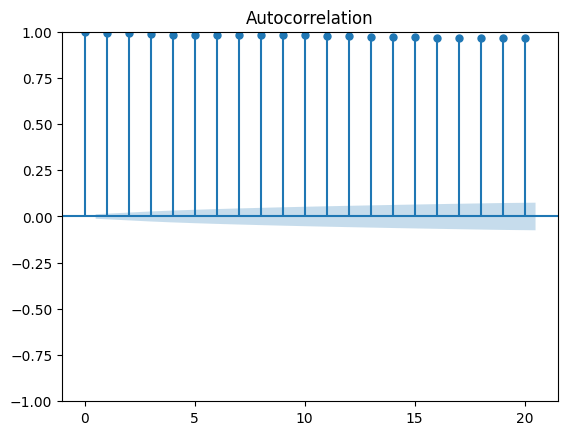

In [10]:
# diff_series = np.diff(avg_job_queue_time, n=1)
# ADF_result = adfuller(diff_series)

# print(f'ADF Statistic: {ADF_result[0]}')
# print(f'p-value: {ADF_result[1]}')


plot_acf(avg_job_queue_time, lags=20);

avg_job_queue_time time series looks random, not predictable (at least by stadistical methods)